In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # Data introduction start

In [2]:
data = pd.read_csv('0_credit.csv',encoding='latin-1')
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
data.shape

(100514, 19)

In [4]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
data.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

### Descriptive Statistics

In [6]:
data.dtypes

Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [7]:
## Numerecal Variables
data_num= data.drop(["Years in current job", "Home Ownership", "Purpose", "Loan Status", "Term"], axis=1)
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [8]:
## Categorecal Variables
data_cat= data[["Years in current job", "Home Ownership", "Purpose", "Loan Status", "Term"]]
data_cat.describe().T

,count,unique,top,freq
Years in current job,95778,11,10+ years,31121
Home Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552
Loan Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208


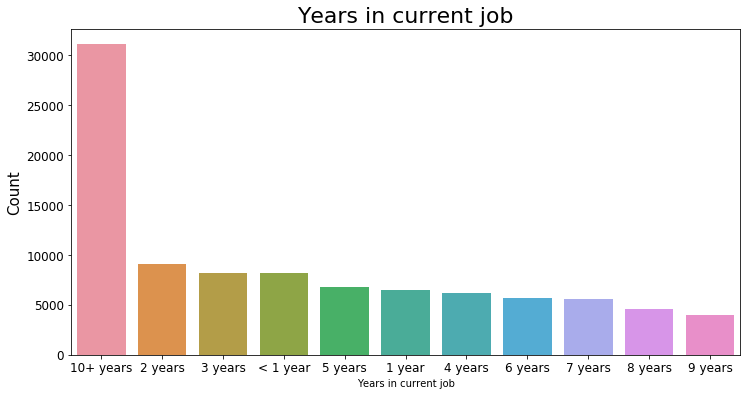

In [9]:
##Years in current job
plt.figure(figsize=(12, 6))
b = sns.countplot(x ='Years in current job', data = data, order=data["Years in current job"].value_counts().index)
b.axes.set_title("Years in current job",fontsize=22)
b.set_ylabel("Count",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

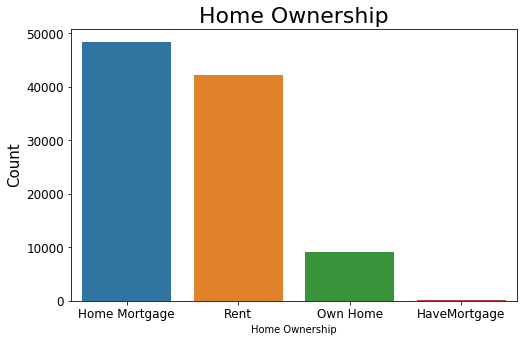

In [10]:
##Home Ownership
plt.figure(figsize=(8, 5))
b = sns.countplot(x ='Home Ownership', data = data, order=data["Home Ownership"].value_counts().index)
b.axes.set_title("Home Ownership",fontsize=22)
b.set_ylabel("Count",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

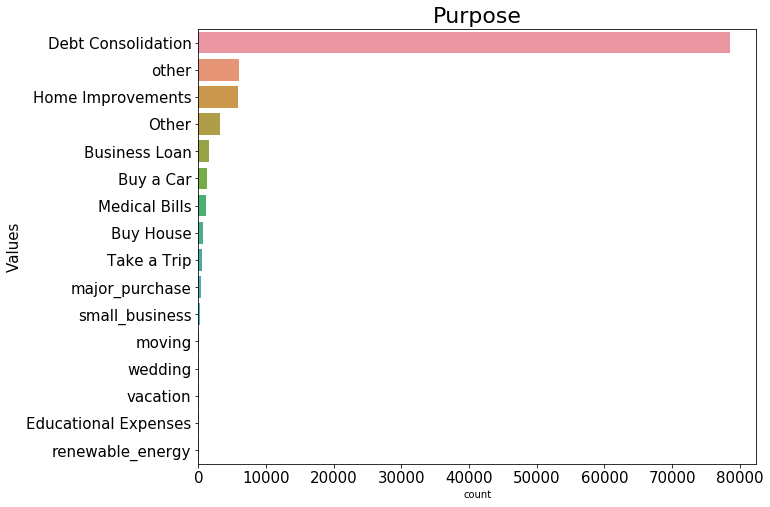

In [11]:
##Purpose
plt.figure(figsize=(10, 8))
b = sns.countplot(y ='Purpose', data = data, order=data.Purpose.value_counts().index)
b.axes.set_title("Purpose",fontsize=22)
b.set_ylabel("Values",fontsize=15)
b.tick_params(labelsize=15)
plt.show()

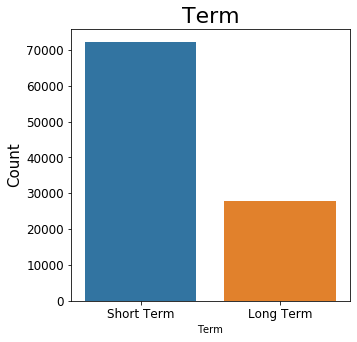

In [12]:
##Term
plt.figure(figsize=(5, 5))
b = sns.countplot(x ='Term', data = data)
b.axes.set_title("Term",fontsize=22)
b.set_ylabel("Count",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

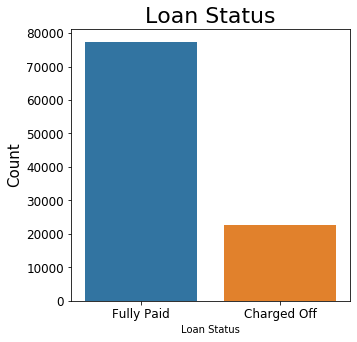

In [13]:
##Loan Status
plt.figure(figsize=(5, 5))
b = sns.countplot(x ='Loan Status', data = data)
b.axes.set_title("Loan Status",fontsize=22)
b.set_ylabel("Count",fontsize=15)
b.tick_params(labelsize=12)
plt.show()

# Missing data Initialisation

In [14]:
msv= data.isnull().sum()
msv_perc= round((data.isnull().sum()*100)/len(data),1)
msv_perc= msv_perc.astype(str) + ' %'
msv_df= pd.DataFrame({'feature': msv.index, 'Missing values': msv.values, 'Percentage': msv_perc.values})
msv_df

,feature,Missing values,Percentage
0,Loan Status,514,0.5 %
1,Current Loan Amount,514,0.5 %
2,Term,514,0.5 %
3,Credit Score,19668,19.6 %
4,Annual Income,19668,19.6 %
5,Years in current job,4736,4.7 %
6,Home Ownership,514,0.5 %
7,Purpose,514,0.5 %
8,Monthly Debt,514,0.5 %
9,Years of Credit History,514,0.5 %


In [15]:
data.dropna(thresh=2).isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [16]:
##drop514 empty rows
data = data.dropna(thresh=2)

In [17]:
##drop 10+2 rows
data= data[data['Tax Liens'].notna() & data['Maximum Open Credit'].notna()]

In [18]:
# ask guys first
data= data.drop(data[data['Bankruptcies'].isnull()].index)

In [19]:
len(data[data['Credit Score'].isnull() & data['Annual Income'].isnull() & data['Years in current job'].isnull()])

810

In [20]:
## on supprime les lignes pour (Annual Income && Credit Score && Years in current job) == null  (810 lignes)
data= data.drop(data[data['Credit Score'].isnull() & data['Annual Income'].isnull() & data['Years in current job'].isnull()].index)

In [21]:
data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    18301
Annual Income                   18301
Years in current job             3412
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    52722
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [22]:
data.drop(['Months since last delinquent'], axis=1, inplace=True)

In [23]:
len(data)

98984

# duplicated values 

In [24]:
data.duplicated().sum()

10201

In [25]:
#Drops duplicated values
data= data.drop_duplicates()

In [26]:
len(data)

88783

# variables constants

In [27]:
## Tax Liens
len(data[data['Tax Liens']== 0])/len(data)

0.9812576732032033

In [28]:
data.drop(['Tax Liens'], axis=1, inplace=True)

# Qualitatif variables and discretisation

In [29]:
data['Term'].value_counts() #ok

Short Term    65140
Long Term     23643
Name: Term, dtype: int64

In [30]:
data['Years in current job'].value_counts() #ok

10+ years    27726
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years in current job, dtype: int64

In [31]:
data['Purpose'].value_counts() #discretisation

Debt Consolidation      70099
Home Improvements        5172
other                    5148
Other                    2850
Business Loan            1349
Buy a Car                1151
Medical Bills             964
Buy House                 580
Take a Trip               482
major_purchase            326
small_business            247
moving                    133
wedding                   102
vacation                   87
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

In [32]:
## remplacer les valeurs rares avec 'Other'
data= data.replace(to_replace =["Business Loan", "other", "Buy a Car", "Medical Bills", "Buy House","Take a Trip","major_purchase", "small_business","moving", "wedding","Educational Expenses", "vacation", "renewable_energy"], value ="Other") 
data['Purpose'].value_counts()

Debt Consolidation    70099
Other                 13512
Home Improvements      5172
Name: Purpose, dtype: int64

In [33]:
data['Home Ownership'].value_counts() #discretisation

Home Mortgage    43100
Rent             37450
Own Home          8052
HaveMortgage       181
Name: Home Ownership, dtype: int64

In [34]:
## combiner Home Mortgage & HaveMortgage
data= data.replace(to_replace =["HaveMortgage"], value ="Home Mortgage") 
data['Home Ownership'].value_counts()

Home Mortgage    43281
Rent             37450
Own Home          8052
Name: Home Ownership, dtype: int64

In [35]:
data['Bankruptcies'].value_counts()

0.0    79244
1.0     9066
2.0      363
3.0       82
4.0       21
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [36]:
## discretisation du variable Bankruptcies
data['Bankruptcies'].mask(data['Bankruptcies'] > 0, '>=1', inplace=True)
data['Bankruptcies'].value_counts()
data['Bankruptcies']=data['Bankruptcies'].astype('object')
data['Bankruptcies'].value_counts()

0.0    79244
>=1     9539
Name: Bankruptcies, dtype: int64

In [37]:
data['Number of Credit Problems'].value_counts()

0.0     76699
1.0     10459
2.0      1118
3.0       327
4.0       107
5.0        43
6.0        13
7.0         8
8.0         3
9.0         2
15.0        1
12.0        1
11.0        1
10.0        1
Name: Number of Credit Problems, dtype: int64

In [38]:
## discretisation du variable Number of Credit Problems
data['Number of Credit Problems'].mask(data['Number of Credit Problems'] >= 2, '>=2', inplace=True)
data['Number of Credit Problems']=data['Number of Credit Problems'].astype('object')
data['Number of Credit Problems'].value_counts()

0.0    76699
1.0    10459
>=2     1625
Name: Number of Credit Problems, dtype: int64

## Export the data 

In [39]:
data.to_csv("feature_selection/data.csv", index=False)

end